In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [12]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [14]:
columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

In [16]:
df = pd.read_csv(url, header=None, names=columns)

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [30]:
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
#Step 6:Compare accuracy
print("Decision Tree - Training Accuracy",dt_clf.score(X_train,y_train))
print("Decision Tree - Testing Accuracy",dt_clf.score(X_test,y_test))
print("Random Forest - Training Accuracy",rf_clf.score(X_train,y_train))
print("Random Forest - Testing Accuracy",rf_clf.score(X_test,y_test))

Decision Tree - Training Accuracy 0.7635009310986964
Decision Tree - Testing Accuracy 0.7186147186147186
Random Forest - Training Accuracy 1.0
Random Forest - Testing Accuracy 0.7532467532467533


In [40]:
importances=rf_clf.feature_importances_
feat_importance=pd.Series(importances,index=X.columns).sort_values(ascending=False)

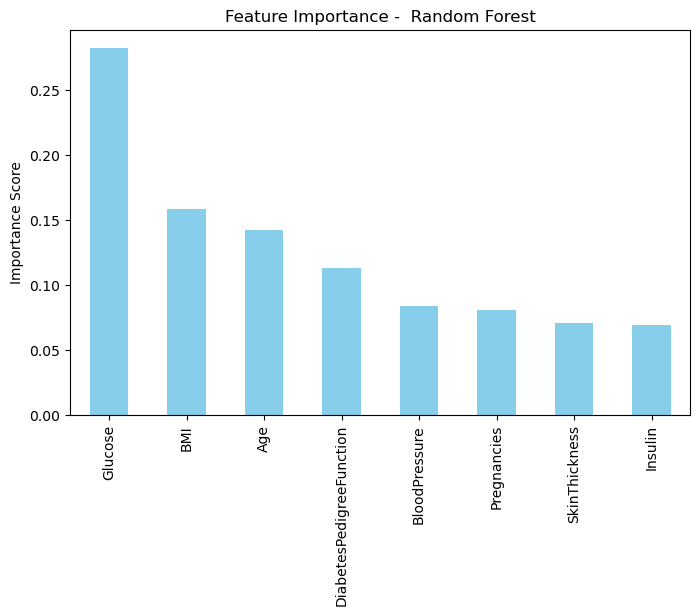

In [44]:
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar',color="skyblue")
plt.title("Feature Importance -  Random Forest")
plt.ylabel("Importance Score")
plt.show()